# Testing Symmetry of Two Networks with the Density Test
The "inference" module of graspologic contains functions that enable quantitative comparison of two networks to assess whether they are statistically similar. This "similarity" can be assessed in a few different ways, depending on the details of the networks to be compared and the preferences of the user. 

The simplest test that can be performed is the density test, which is based upon the Erdos-Renyi model. Under this model, it is assumed that the probability of an edge between any two nodes of the network is some constant, p. To compare two networks, then, the question is whether the edge probability for the first network is different from the edge probability for the second network. This test can be performed easily with the inference module, and the procedure is described in greater detail below. 

## The Erdos-Renyi (ER) model
The [**Erdos-Renyi (ER) model**
](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model)
is one of the simplest network models. This model treats
the probability of each potential edge in the network occuring to be the same. In
other words, all edges between any two nodes are equally likely.

```{admonition} Math
Let $n$ be the number of nodes. We say that for all $(i, j), i \neq j$, with $i$ and
$j$ both running
from $1 ... n$, the probability of the edge $(i, j)$ occuring is:

$$ P[A_{ij} = 1] = p_{ij} = p $$

Where $p$ is the the global connection probability.

Each element of the adjacency matrix $A$ is then sampled independently according to a
[Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution):

$$ A_{ij} \sim Bernoulli(p) $$

For a network modeled as described above, we say it is distributed

$$ A \sim ER(n, p) $$

```

Thus, for this model, the only parameter of interest is the global connection
probability, $p$. This is sometimes also referred to as the **network density**.

## Testing under the ER model
In order to compare two networks $A^{(L)}$ and $A^{(R)}$ under this model, we
simply need to compute these network densities ($p^{(L)}$ and $p^{(R)}$), and then
run a statistical test to see if these densities are significantly different.

```{admonition} Math
Under this
model, the total number of edges $m$ comes from a $Binomial(n(n-1), p)$ distribution,
where $n$ is the number of nodes. This is because the number of edges is the sum of
independent Bernoulli trials with the same probability. If $m^{(L)}$ is the number of
edges on the left
hemisphere, and $m^{(R)}$ is the number of edges on the right, then we have:

$$m^{(L)} \sim Binomial(n^{(L)}(n^{(L)} - 1), p^{(L)})$$

and independently,

$$m^{(R)} \sim Binomial(n^{(R)}(n^{(R)} - 1), p^{(R)})$$

To compare the two networks, we are just interested in a comparison of $p^{(L)}$ vs.
$p^{(R)}$. Formally, we are testing:

$$H_0: p^{(L)} = p^{(R)}, \quad H_a: p^{(L)} \neq p^{(R)}$$

Fortunately, the problem of testing for equal proportions is well studied.
Using graspologic.inference, we can conduct this comparison using either
Fisher's exact test or the chi-squared test by using method="fisher" or 
method = "chi2", respectively. In this example, we use Fisher's exact test.
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from graspologic.inference.density_test import density_test
from graspologic.simulations import er_np
from graspologic.plot import heatmap

np.random.seed(8888)

%matplotlib inline

/home/runner/.cache/pypoetry/virtualenvs/graspologic-pkHfzCJ8-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Performing the Density Test 

To illustrate the density test, we will first randomly generate two networks of known density to compare using the test. 

<Axes: title={'center': 'Adjacency Matrix for Network 2'}>

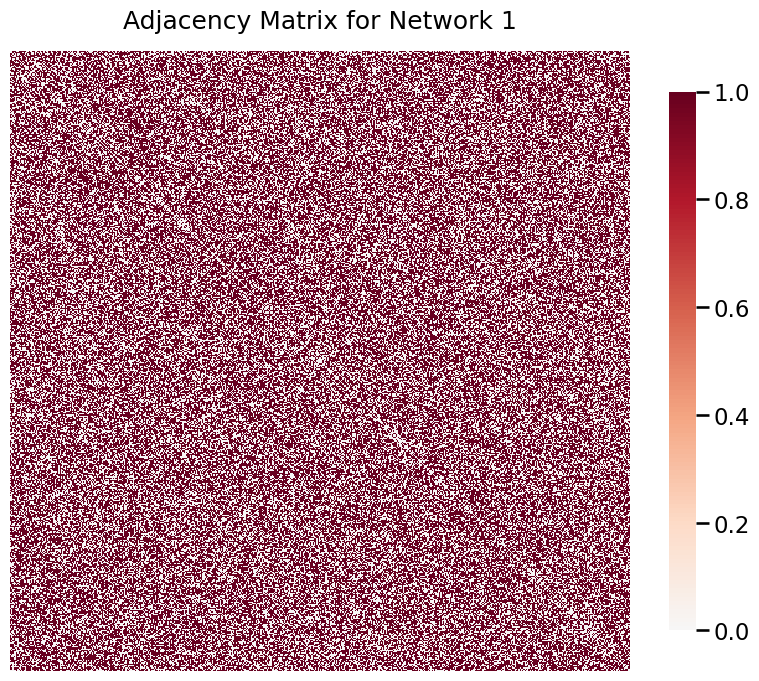

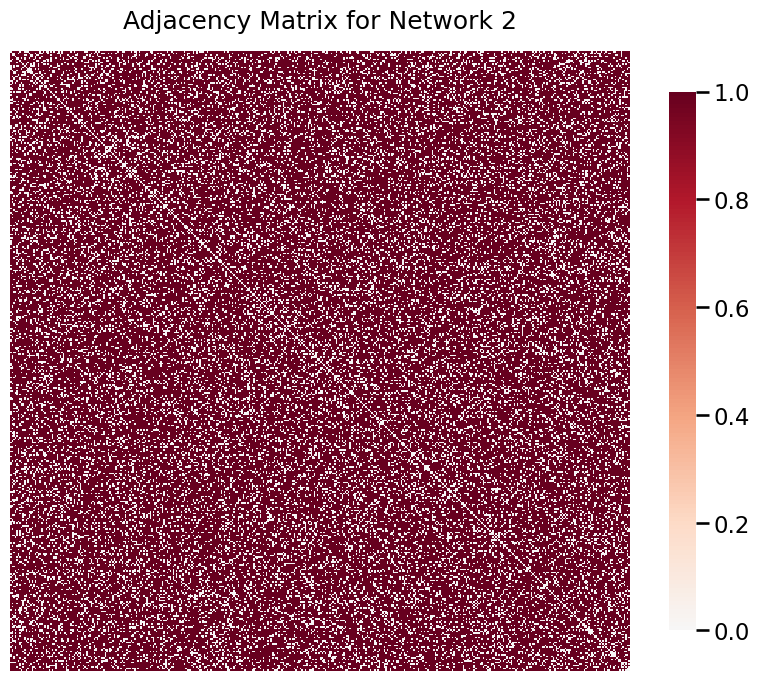

In [2]:
A1 = er_np(500, 0.6)
A2 = er_np(400, 0.8)
heatmap(A1, title='Adjacency Matrix for Network 1')
heatmap(A2, title='Adjacency Matrix for Network 2')

Visibly, these networks have very different densities. We can statistically confirm this difference by conducting a density test.

In [3]:
stat, pvalue, er_misc = density_test(A1,A2)
print(pvalue)


0.0


/home/runner/work/graspologic/graspologic/graspologic/inference/group_connection_test.py:362: UserWarning: This test assumes that the networks are directed, but one or both adjacency matrices are symmetric.
  warnings.warn(msg)
